In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Input_Data = pd.read_csv("data.csv")
Input_Data.head()

,PH,Turbidity,temperature,Potability
0,3.716080,2.963135,4.3,0
1,8.099124,4.500656,5.9,0
2,8.316766,3.055934,4.3,0
3,9.092223,4.628771,7.5,0
4,5.584087,4.075075,4.5,0


In [3]:
Input_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PH           49 non-null     float64
 1   Turbidity    49 non-null     float64
 2   temperature  49 non-null     float64
 3   Potability   49 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 1.7 KB


In [4]:
Input_Data.describe()

,PH,Turbidity,temperature,Potability
count,49.000000,49.000000,49.000000,49.000000
mean,7.359480,4.044541,5.004082,0.510204
std,1.987684,0.834371,1.222695,0.505076
min,3.445062,2.436086,3.600000,0.000000
25%,5.702926,3.464353,4.100000,0.000000
50%,7.371050,4.137739,4.500000,1.000000
75%,8.757257,4.528523,5.700000,1.000000
max,11.180284,6.038185,7.500000,1.000000


In [5]:
Input_Data.value_counts('Potability')

,count
Potability,
1,25
0,24


In [6]:
Input_Data.isna().sum()

,0
PH,0
Turbidity,0
temperature,0
Potability,0


**Data Visualization**

<Axes: >

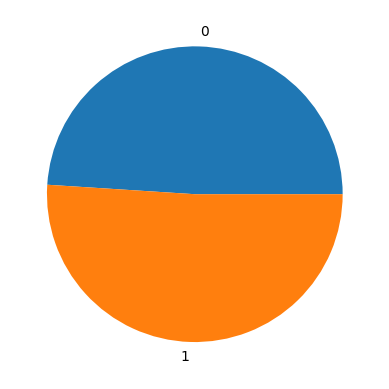

In [7]:
Input_Data.groupby('Potability').size().plot(kind='pie')

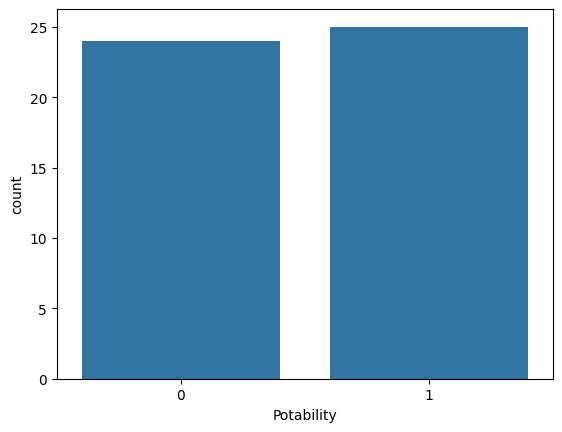

In [9]:
# count plot on single categorical variable
sns.countplot(x ='Potability', data = Input_Data)

# Show the plot
plt.show()

<Axes: xlabel='PH'>

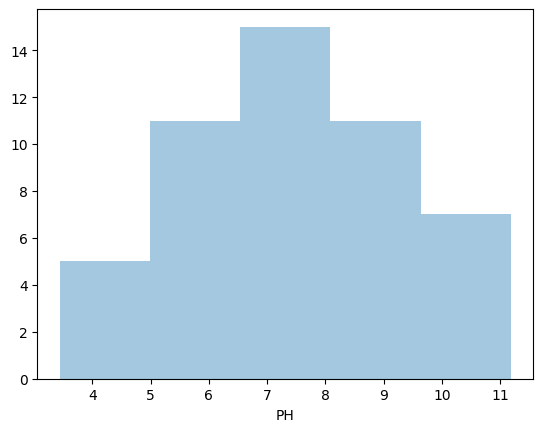

In [8]:
sns.distplot(a=Input_Data['PH'], kde=False)

<Axes: xlabel='Turbidity'>

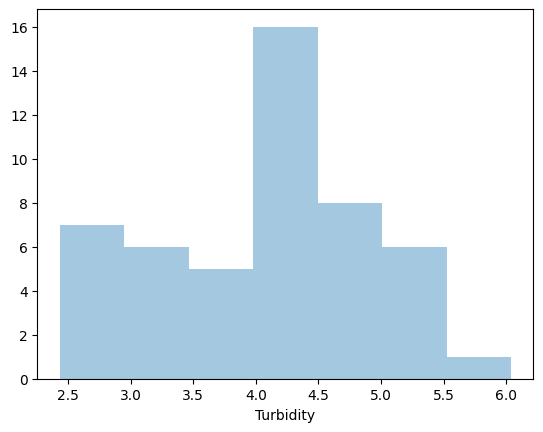

In [10]:
sns.distplot(a=Input_Data['Turbidity'], kde=False)

<Axes: xlabel='temperature'>

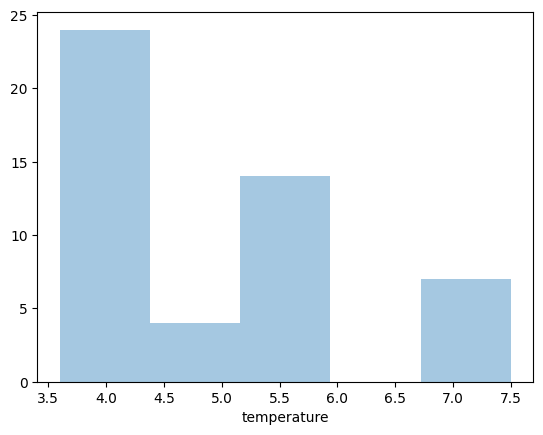

In [12]:
sns.distplot(a=Input_Data['temperature'], kde=False)

<Axes: xlabel='PH', ylabel='Density'>

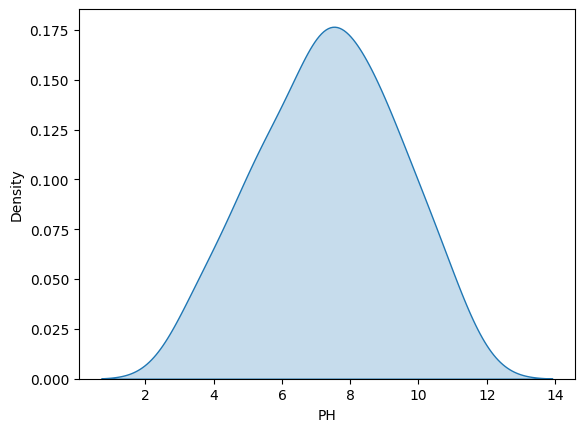

In [13]:
sns.kdeplot(data=Input_Data['PH'], shade=True)

<Axes: xlabel='Turbidity', ylabel='Density'>

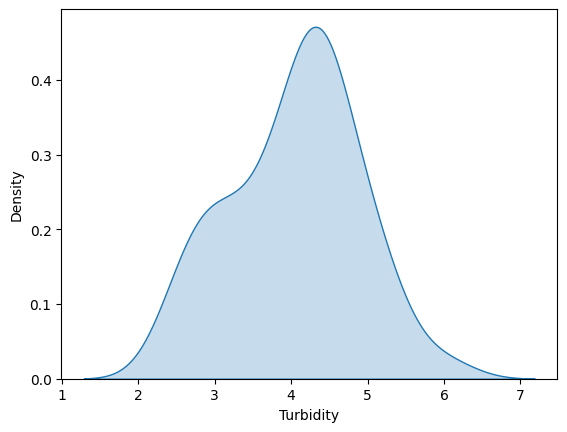

In [14]:
sns.kdeplot(data=Input_Data['Turbidity'], shade=True)

<Axes: xlabel='temperature', ylabel='Density'>

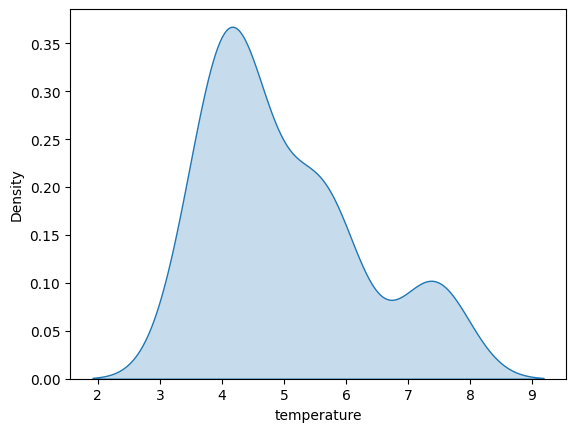

In [15]:
sns.kdeplot(data=Input_Data['temperature'], shade=True)

<Axes: >

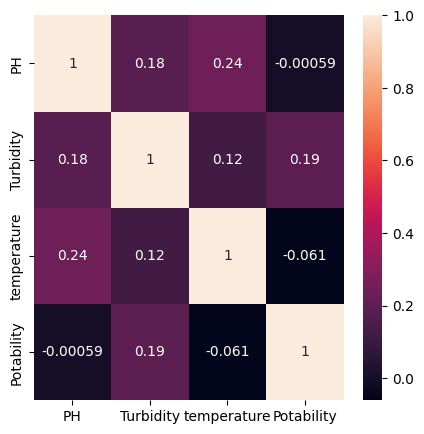

In [16]:
import seaborn as sns
corr = Input_Data.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot = True)

In [22]:
Input = Input_Data.drop('Potability',axis =1)
Output = Input_Data['Potability']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size = 0.2, random_state=0)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
classifier_RF = RandomForestClassifier()
classifier_RF = classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)
Accuracy_RF = accuracy_score(y_test,y_pred_RF)
print("Model Accuracy of Random Forest Algorithm:",Accuracy_RF)

Model Accuracy of Random Forest Algorithm: 0.8


Confusion Matrix:
[[2 1]
 [1 6]]


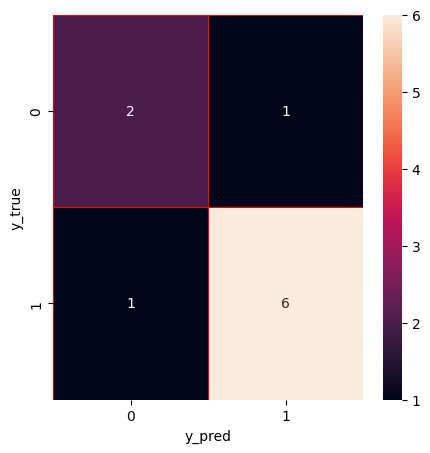

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred_RF)
print("Confusion Matrix:")
print(result)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(result,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [26]:
result1 = classification_report(y_test, y_pred_RF)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10

